In [48]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt

ratings = pd.read_csv(r"C:\Users\vaishnavi.singh\Documents\DataSet\Recommend.csv")
ratings.columns =['userID','ID','bookRating','ISBN']

ratings_new = ratings[ratings.ISBN.isin(ratings.ISBN)]
ratings_new = ratings_new[ratings_new.userID.isin(ratings.userID)]

ratings_explicit = ratings_new[ratings_new.bookRating != 0]
ratings_implicit = ratings_new[ratings_new.bookRating == 0]

ratings_count = pd.DataFrame(ratings_explicit.groupby(['ISBN'])['bookRating'].sum())
top10 = ratings_count.sort_values('bookRating', ascending= False).head(10)
top10.merge(ratings, left_index =True, right_on = 'ISBN')

counts1 = ratings_explicit['userID'].value_counts()
# ratings_explicit = ratings_explicit[ratings_explicit['userID'].isin(counts1[counts1 > 5 ]).index]
# counts = ratings_explicit['userID'].value_counts()
# ratings_explicit = ratings_explicit[ratings_explicit['bookRating'].isin(counts1[counts1 >= 100 ]).index()]

# ratings_matrix = ratings_explicit.pivot(index="userID", columns='ISBN', values='bookRating')
# userID = ratings_matrix.index
# ISBN = ratings_matrix.columns
# print(ratings_matrix.shape)
# ratings_matrix.head()

print(ratings.ISBN.shape)
print(ratings.ISBN.isin(ratings.ISBN))

updRating=ratings[ratings.ISBN.isin(ratings.ISBN)]
updRating=updRating[updRating.userID.isin(ratings.userID)]

(99999,)
0        True
1        True
2        True
3        True
4        True
         ... 
99994    True
99995    True
99996    True
99997    True
99998    True
Name: ISBN, Length: 99999, dtype: bool


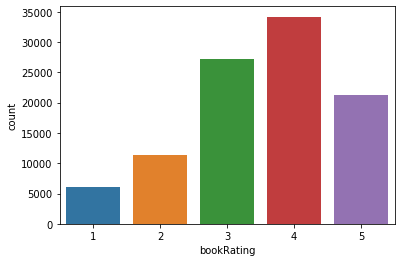

In [49]:
sns.countplot(data=updRating[updRating.bookRating>=0],x='bookRating')
plt.show()

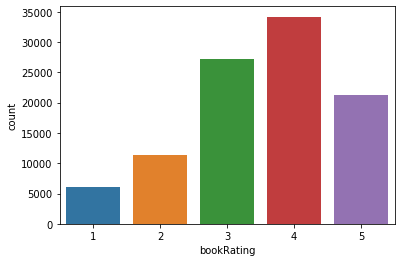

In [50]:
ratingCorr=updRating[updRating.bookRating>0]
ratingErr=updRating[updRating.bookRating==0]
sns.countplot(data=ratingCorr,x='bookRating')
plt.show()

In [61]:
# countExp=ratings['userID'].value_counts()
# ratingCorr=ratings[ratingCorr['userID'].isin(countExp[countExp>=100].index)]
# counts=ratings['bookRating'].value_counts()
# ratingCorr=ratingCorr[ratingCorr['bookRating'].isin(counts[counts>=100].index)]
# rating_matrix=ratingCorr.pivot(index='userId',columns='ISBN',values='bookRating')
# userId=rating_matrix.index
# ISBN=rating_matrix.columns
# print(rating_matrix.shape)
# print(rating_matrix)